In [100]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

# Load CO2 and temperature data

In [101]:
df = pd.read_csv('./../co2_annual.csv')
df.head()

,year,mean,unc
0,1959,315.97,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


In [102]:
year = df['year']
co2 = df['mean']

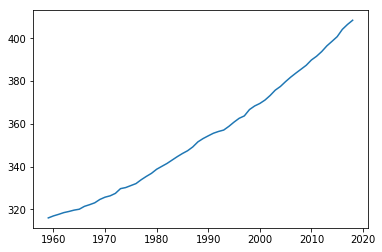

In [103]:
plt.plot(year, co2)

In [104]:
uptake_df = pd.read_csv('./../gcb_data/budget.csv')
uptake_df.head()

,Year,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
0,1959,2.453378,1.810588,2.0352,0.852376,0.516073,0.860316
1,1960,2.568376,1.672592,1.5052,0.819017,1.394030,0.522722
2,1961,2.579724,1.607579,1.6536,0.714842,0.605098,1.213762
3,1962,2.685099,1.566764,1.1872,0.756709,1.348349,0.959605
4,1963,2.832715,1.513809,1.2084,0.904997,0.877794,1.355333


In [105]:
temp_df = pd.read_csv('./../temp_anomaly.csv')
temp_df.head()

,Entity,Year,Median,Upper,Lower
0,Global,1850,-0.373,-0.339,-0.425
1,Global,1851,-0.218,-0.184,-0.274
2,Global,1852,-0.228,-0.196,-0.280
3,Global,1853,-0.269,-0.239,-0.321
4,Global,1854,-0.248,-0.218,-0.301


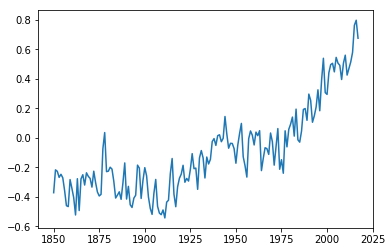

In [106]:
temp_global = temp_df[temp_df['Entity']=='Global']
plt.plot(temp_global.Year, temp_global.Median)

### Create variables of carbon cycle and temperature

In [107]:
ocean = uptake_df['ocean sink']
land = uptake_df['land sink']
total_uptake = ocean + land

temp_global = temp_df[temp_df['Entity']=='Global']
temp_global = temp_global[['Year', 'Median']][108:168]

## Generator to produce equally-sized chunks

In [108]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

# CO2 Feedback

In [109]:
co2_increase = []
for i in range(1,co2.size):
    co2_increase.append(co2[i]-co2[i-1])

co2_increase = np.array(co2_increase)

### Plots of uptake and CO2 increase

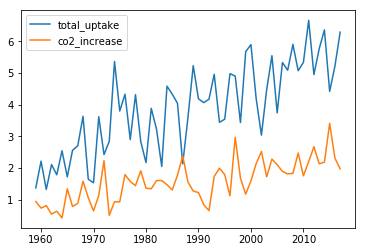

In [110]:
plt.plot(year[0:59], total_uptake)
plt.plot(year[0:59], co2_increase)
plt.legend(['total_uptake', 'co2_increase'])

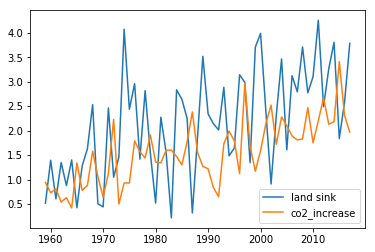

In [111]:
plt.plot(year[0:59], land)
plt.plot(year[0:59], co2_increase)
plt.legend(['land sink', 'co2_increase'])

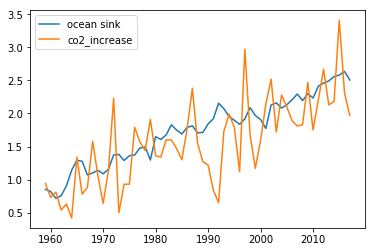

In [112]:
plt.plot(year[0:59], ocean)
plt.plot(year[0:59], co2_increase)
plt.legend(['ocean sink', 'co2_increase'])

### Plots of feedback (uptake/co2 increase)

LinregressResult(slope=-0.005825887218930931, intercept=14.366450351221843, rvalue=-0.07905692249205692, pvalue=0.5517179707206314, stderr=0.009730234623394125)

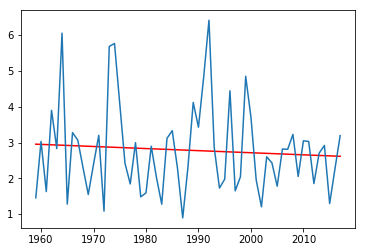

In [113]:
regg = stats.linregress(year[0:59], total_uptake/co2_increase)
slope = regg[0]
intercept = regg[1]

plt.plot(year[0:59], slope*year[0:59]+intercept, color='r')
plt.plot(year[0:59], total_uptake/co2_increase)
regg

LinregressResult(slope=-0.002434451962156436, intercept=6.391603102318381, rvalue=-0.04689659698151052, pvalue=0.7243085175272048, stderr=0.006868222500475148)

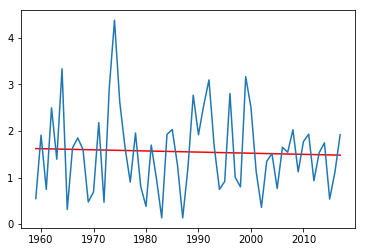

In [114]:
regg = stats.linregress(year[0:59], land/co2_increase)
slope = regg[0]
intercept = regg[1]

plt.plot(year[0:59], slope*year[0:59]+intercept, color='r')
plt.plot(year[0:59], land/co2_increase)
regg

LinregressResult(slope=-0.0033914352567744957, intercept=7.974847248903464, rvalue=-0.11699032746225492, pvalue=0.3775452112910106, stderr=0.0038133229124040716)

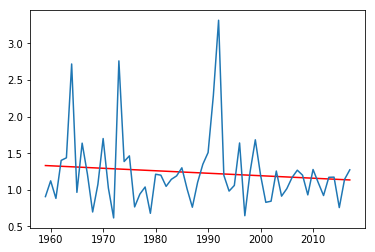

In [115]:
regg = stats.linregress(year[0:59], ocean/co2_increase)
slope = regg[0]
intercept = regg[1]

plt.plot(year[0:59], slope*year[0:59]+intercept, color='r')
plt.plot(year[0:59], ocean/co2_increase)
regg

### 25-year average of CO2 feedbacks

In [143]:
beta_total = total_uptake/co2_increase
b_total_mean = []
for i in chunks(beta_total,20):
    b_total_mean.append(np.mean(i))
b_total_mean

[2.9916948698546335, 2.736108529066132, 2.6176073189908777]

In [144]:
beta_land = land/co2_increase
b_land_mean = []
for i in chunks(beta_land,20):
    b_land_mean.append(np.mean(i))
b_land_mean

[1.704284588720446, 1.442683369539328, 1.506499175070332]

In [145]:
beta_ocean = ocean/co2_increase
b_ocean_mean = []
for i in chunks(beta_ocean,20):
    b_ocean_mean.append(np.mean(i))
b_ocean_mean

[1.2874102811341877, 1.2934251595268038, 1.1111081439205457]

# Climate Change (Temperature) feedback

In [119]:
temp_increase = []
temp = temp_global.Median.reset_index(drop=True)
for i in range(1,temp.size):
    temp_increase.append(temp[i]-temp[i-1])
    
temp_increase = np.array(temp_increase)

### Plots of uptake and temperature increase

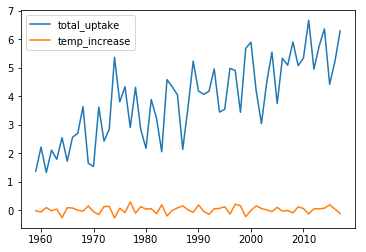

In [120]:
plt.plot(year[0:59], total_uptake)
plt.plot(year[0:59], temp_increase)
plt.legend(['total_uptake', 'temp_increase'])

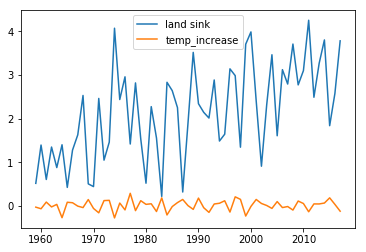

In [121]:
plt.plot(year[0:59], land)
plt.plot(year[0:59], temp_increase)
plt.legend(['land sink', 'temp_increase'])

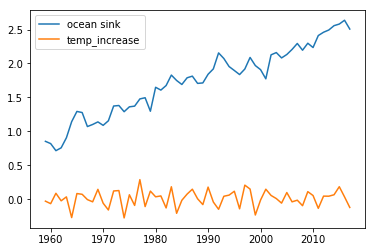

In [122]:
plt.plot(year[0:59], ocean)
plt.plot(year[0:59], temp_increase)
plt.legend(['ocean sink', 'temp_increase'])

### Plots of feedback (uptake/temperature increase)

LinregressResult(slope=1.1270126729962213, intercept=-2240.9008203376243, rvalue=0.1228477934554422, pvalue=0.3539578628153872, stderr=1.205929548233309)

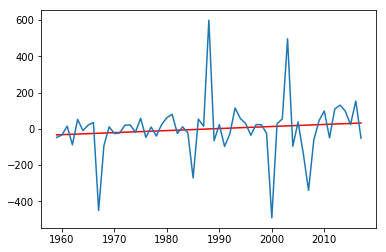

In [123]:
regg = stats.linregress(year[0:59], total_uptake/temp_increase)
slope = regg[0]
intercept = regg[1]

plt.plot(year[0:59], slope*year[0:59]+intercept, color='r')
plt.plot(year[0:59], total_uptake/temp_increase)
regg

LinregressResult(slope=0.5867878803852885, intercept=-1171.2531144527886, rvalue=0.1114653780886336, pvalue=0.40063567805208644, stderr=0.6929291968685846)

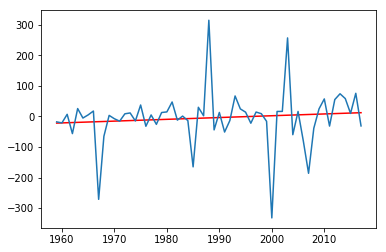

In [124]:
regg = stats.linregress(year[0:59], land/temp_increase)
slope = regg[0]
intercept = regg[1]

plt.plot(year[0:59], slope*year[0:59]+intercept, color='r')
plt.plot(year[0:59], land/temp_increase)
regg

LinregressResult(slope=0.5402247926109324, intercept=-1069.6477058848345, rvalue=0.1359259735177805, pvalue=0.30465505320032815, stderr=0.521536996774295)

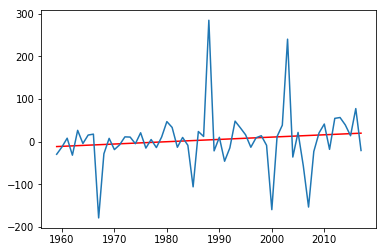

In [125]:
regg = stats.linregress(year[0:59], ocean/temp_increase)
slope = regg[0]
intercept = regg[1]

plt.plot(year[0:59], slope*year[0:59]+intercept, color='r')
plt.plot(year[0:59],ocean/temp_increase)
regg

### 25-year average of climate feedbacks

In [139]:
gamma_total = total_uptake/temp_increase
g_total_mean = []
for i in chunks(gamma_total,20):
    g_total_mean.append(np.mean(i))
g_total_mean

[-31.472410680426805, 28.786562601439265, 1.5862633017218017]

In [140]:
gamma_land = land/temp_increase
g_land_mean = []
for i in chunks(gamma_land,20):
    g_land_mean.append(np.mean(i))
g_land_mean

[-20.52981814126495, 12.234082129947291, -5.920787701943355]

In [141]:
gamma_ocean = ocean/temp_increase
g_ocean_mean = []
for i in chunks(gamma_ocean,20):
    g_ocean_mean.append(np.mean(i))
g_ocean_mean

[-10.942592539161868, 16.552480471491968, 7.507051003665158]

# Linear Regression to determine parameters

Perform linear regression to determine the parameters by finding the gradient of the regression.

LinregressResult(slope=0.44471196784379147, intercept=1.4558953194297817, rvalue=0.2667920919918921, pvalue=0.04109124852153196, stderr=0.2127818981673514)

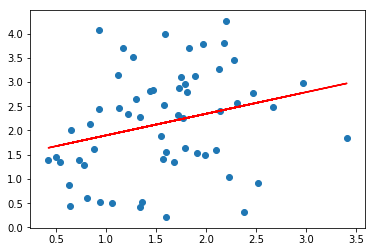

In [129]:
# Beta-land (land uptake vs. co2 increase)
reg_bl = stats.linregress(co2_increase, land)
slope = reg_bl[0]
intercept = reg_bl[1]

plt.plot(co2_increase,slope*co2_increase+intercept, color='r')
plt.scatter(co2_increase, land)
reg_bl

LinregressResult(slope=0.5553626417100332, intercept=0.8622731213243464, rvalue=0.7091627838464557, pvalue=3.256122860970026e-10, stderr=0.07313242955273216)

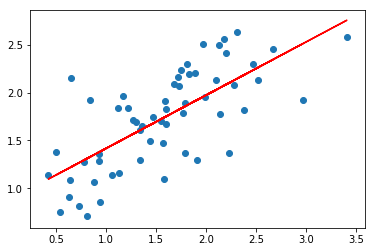

In [130]:
# Beta-ocean (ocean uptake vs. co2 increase)
reg_bo = stats.linregress(co2_increase, ocean)
slope = reg_bo[0]
intercept = reg_bo[1]

plt.plot(co2_increase,slope*co2_increase+intercept, color='r')
plt.scatter(co2_increase, ocean)
reg_bo

LinregressResult(slope=-3.9059793692954172, intercept=2.1951318219252003, rvalue=-0.43829838913145397, pvalue=0.0005164922437977438, stderr=1.0609623547364788)

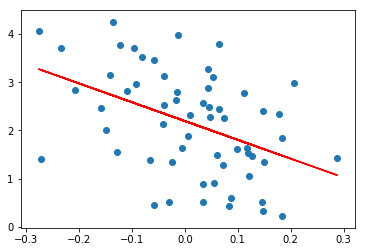

In [131]:
# Gamma-land (land uptake vs. temp increase)
reg_gl = stats.linregress(temp_increase, land)
slope = reg_gl[0]
intercept = reg_gl[1]

plt.plot(temp_increase,slope*temp_increase+intercept, color='r')
plt.scatter(temp_increase, land)
reg_gl

LinregressResult(slope=0.388766304954335, intercept=1.7292947905522664, rvalue=0.09285465589504507, pvalue=0.48425009924869955, stderr=0.5521628015457918)

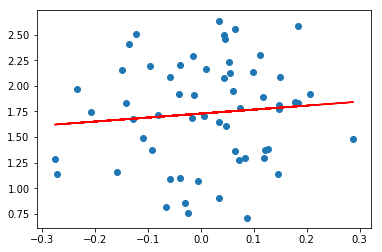

In [132]:
# Gamma-ocean (ocean uptake vs. temp increase)
reg_go = stats.linregress(temp_increase, ocean)
slope = reg_go[0]
intercept = reg_go[1]

plt.plot(temp_increase,slope*temp_increase+intercept, color='r')
plt.scatter(temp_increase, ocean)
reg_go

# Ordinary Least Squares (Multiple) Regression to determine parameters

Perform Ordinary Least Squares regression to determine the parameters in conjuction with each other (land and ocean still separate).

In [133]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Land uptake

In [134]:
x = np.column_stack((co2_increase,temp_increase))
x = sm.add_constant(x, prepend=True)

results = smf.OLS(land,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              land sink   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     19.74
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           3.26e-07
Time:                        13:00:18   Log-Likelihood:                -72.254
No. Observations:                  59   AIC:                             150.5
Df Residuals:                      56   BIC:                             156.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8820      0.306      2.880      0.006       0.269       1.496
x1             0.8489      0.185      4.597      0.000       0.479       1.219
x2            -5.6438      0.987     -5.716      0.000      -7.622      -3.666
==============================================================================
Omnibus:                        1.603   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.449   Jarque-Bera (JB):                1.503
Skew:                          -0.277   Prob(JB):                        0.472
Kurtosis:                       2.449   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ocean uptake

In [135]:
x = np.column_stack((co2_increase,temp_increase))
x = sm.add_constant(x, prepend=True)

results = smf.OLS(ocean, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ocean sink   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     32.91
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           3.54e-10
Time:                        13:00:18   Log-Likelihood:                -20.494
No. Observations:                  59   AIC:                             46.99
Df Residuals:                      56   BIC:                             53.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7731      0.127      6.070      0.000       0.518       1.028
x1             0.6181      0.077      8.048      0.000       0.464       0.772
x2            -0.8766      0.411     -2.135      0.037      -1.699      -0.054
==============================================================================
Omnibus:                        0.691   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.738
Skew:                          -0.032   Prob(JB):                        0.691
Kurtosis:                       2.456   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear regression between CO2 increase and temperature increase.

This will determine a value of alpha (Friedlingstein et al., 2006) which is the linear transient climate sensitivity to CO2 (in K/ppm).

LinregressResult(slope=0.07161856504422015, intercept=-0.10168302025156901, rvalue=0.3828951110626944, pvalue=0.002761450604297272, stderr=0.0228866632942503)

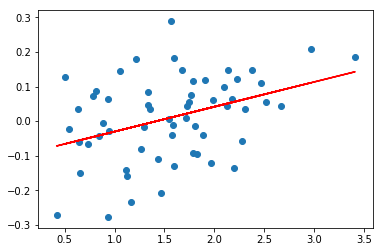

In [138]:
reg = sp.stats.linregress(co2_increase, temp_increase)
slope = reg[0]
intercept = reg[1]

plt.plot(co2_increase,slope*co2_increase+intercept, color='r')
plt.scatter(co2_increase, temp_increase)
reg